# CLUB algorithm draft - Online Clustering of Bandits

Antoine GRELETY

Vincent LE MEUR

In [147]:
import numpy as np
import numpy.random as npr
import numpy.linalg
import pandas as pd
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt

In [148]:
%load_ext autoreload
%autoreload 2
import online_cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
Online =online_cluster.OLCB(T=5000,n_user=60,D=3,c=3)

On représente tous les n_users :

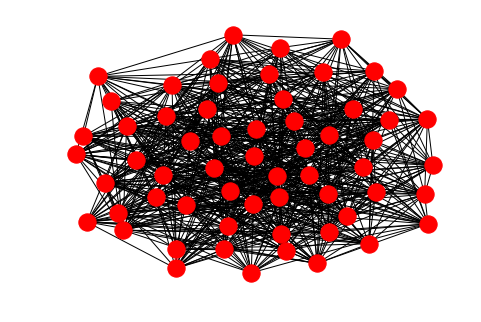

In [150]:
nx.draw(Online.V)
plt.show()

On mets en place l'algorithme CLUB pour obtenir plusieurs clusters :

In [151]:
Result =Online.CLUB(sigma=0.01,alpha=5,alpha2=2,z=0)

Regardons l'évolution du nombre de Cluster au fur et à mesure des ittérations :

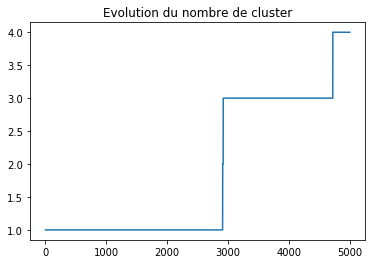

In [154]:
plt.plot(Result[0])
plt.title("Evolution du nombre de cluster")
plt.show()

Observons l'évolution des Confidence Bound :

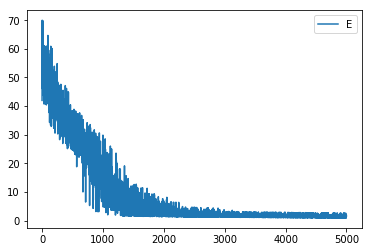

In [155]:
plt.plot(Result[1])
plt.legend("Evolution des Confidence Bound")
plt.show()

Observons l'évolution de la payoff cumulée en fonction des ittérations :

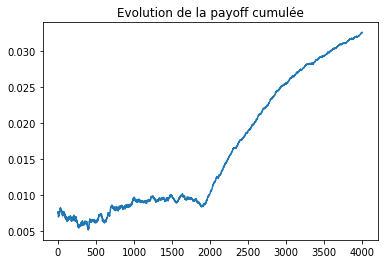

In [158]:
#mean payoff cumulée
payoff_mean_cum=np.zeros(Online.T)
payoff_vec=np.array(Result[3])
for i in range(1,Online.T):
    payoff_mean_cum[i]=np.mean(payoff_vec[:i])
plt.plot(payoff_mean_cum[1000:Online.T])
plt.title("Evolution de la payoff cumulée")
plt.show()

Observons enfin le regret cumulé associé : 

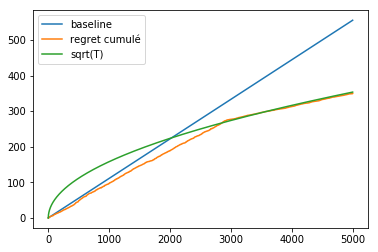

In [159]:
plt.plot(np.arange(Online.T)/9)
plt.plot(-Result[4])
plt.plot(5*np.sqrt(np.arange(Online.T)))
plt.legend(["baseline","regret cumulé","sqrt(T)"])
plt.show()